In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite.sqlite")

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
df = pd.io.sql.read_sql("SELECT datetime From pageviews WHERE uid like 'user_%'", connection, parse_dates="datetime")
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## using Pandas, create a new dataframe where the visits are counted and grouped by date

In [4]:
new = df["datetime"].dt.date.value_counts()
new = pd.DataFrame(new).rename(columns={"datetime": "views"})
new

,views
2020-05-11,200
2020-05-14,187
2020-05-10,110
2020-05-13,102
2020-05-12,85
2020-05-18,51
2020-05-08,48
2020-05-15,29
2020-04-18,23
2020-05-03,19


##  using Pandas method .plot(), create a graph
- the size of the font should be 8
- the size of the figure is (15,8)
- the graph must have the title Views per day
- notice the rotation of xticks on the graph below

<AxesSubplot:title={'center':'Views per day'}, xlabel='date'>

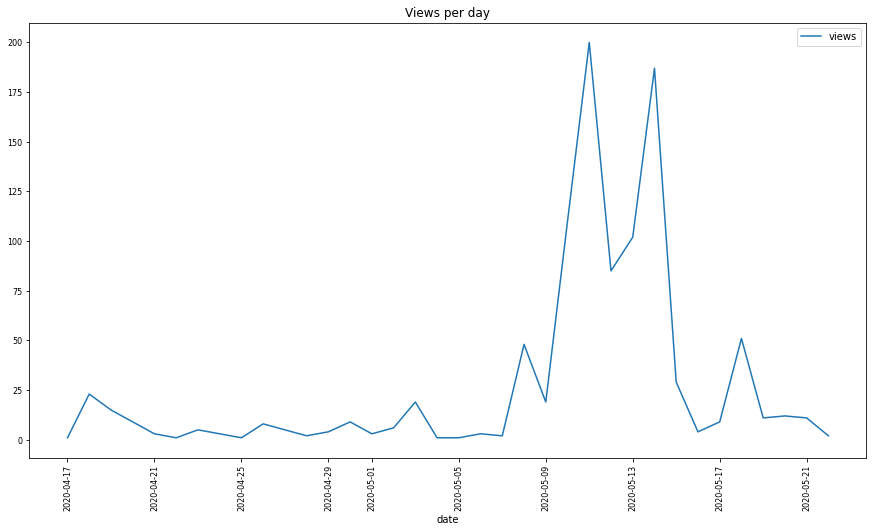

In [5]:
new.plot( y="views", title="Views per day", fontsize=8, figsize=(15,8), rot=90, 
          xlabel="date")

##  close the connection to the database

In [6]:
connection.close()